# Grading Sleep Efficiency

## About the data

The dataset contains information about a group of test subjects and their sleep patterns.

Each test subject is identified by:
- Subject ID (unique)
- Age
- Gender
- Bedtime - when each subject goes to bed
- Wakeup - when each subject wakes up each day
- Sleep duration - the total amount of time each subject slept in hours
- Sleep efficiency - measure of the proportion of time spent in bed that is spent asleep
- REM sleep percentage - amount of time each subject spent in that stage of sleep
- Deep sleep percentage - amount of time each subject spent in that stage of sleep
- Light sleep percentage - amount of time each subject spent in that stage of sleep
- Awakenings - the number of times each subject wakes up during the night
- Caffeine - consumption in the 24 hours prior to bedtime
- Alcohol - consumption in the 24 hours prior to bedtime
- Smoking status
- Exercise frequency

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing Data

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Sleep_Efficiency.csv', index_col = 0)

In [ ]:
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
df.shape

(452, 14)

## Finding Null Values
- Awakenings, Caffeine consumption, Alcohol consumption, Exercise frequency all have Null values
- Nulls aren't concentrated in the same rows and only affect a few columns
- 66 rows would be dropped if all rows with nulls were excluded
- 14.6% of data would be lost if all rows with nulls were dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     436 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [ ]:
df.Age.value_counts()


52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: Age, Length: 61, dtype: int64

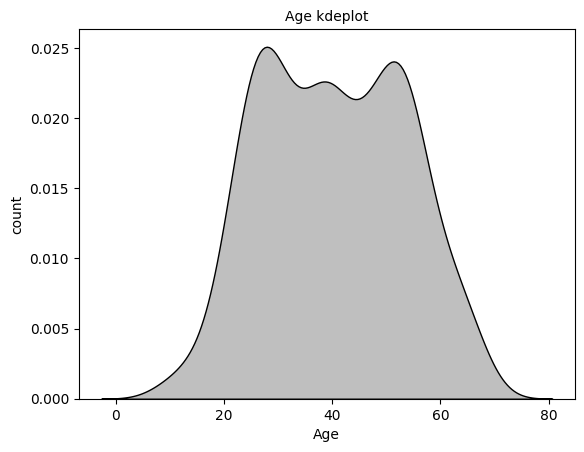

In [ ]:
sns.kdeplot(data=df, x="Age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=10)
plt.ylabel("count", color="black", fontsize=10)
plt.title("Age kdeplot", color="black",fontsize=10)
plt.show()

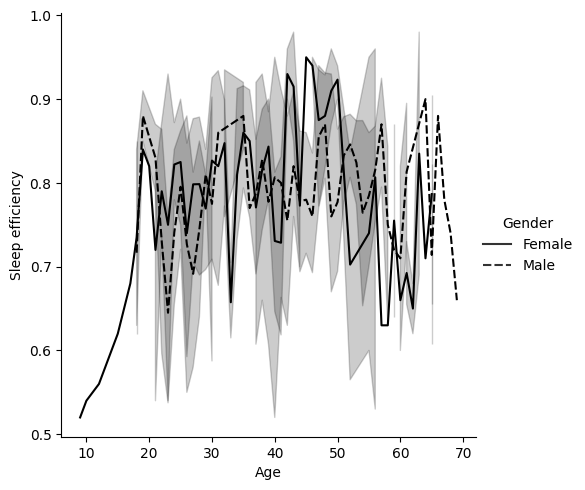

In [ ]:
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep efficiency", style="Gender", color="black"
)
plt.show()

In [ ]:
print(f"{df.shape[0] - df.dropna().shape[0]} rows would be dropped if all rows with nulls were excluded")
print(f"{((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100 :.1f}% of data would be lost if all rows with nulls were dropped")

66 rows would be dropped if all rows with nulls were excluded
14.6% of data would be lost if all rows with nulls were dropped


## Converting Bedtime and Wakeup Time to datetime

In [ ]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

In [ ]:
# Hour and Minute Fields for Bedtime and Wakeup Time

df['Bedime_Hour'] = [x.time().hour for x in df['Bedtime']]
df['Bedime_Minutes'] = [x.time().minute for x in df['Bedtime']]

df['Wakeup_Hour'] = [x.time().hour for x in df['Wakeup time']]
df['Wakeup_Minutes'] = [x.time().minute for x in df['Wakeup time']]

In [ ]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Bedime_Hour,Bedime_Minutes,Wakeup_Hour,Wakeup_Minutes
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480,10.661504,10.685841,6.898230,12.212389
std,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134,10.571812,14.382130,1.966075,14.755029
min,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000,2.000000,0.000000,7.000000,0.000000
75%,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000,22.000000,30.000000,9.000000,30.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000,23.000000,30.000000,12.000000,30.000000


## Feature Distributions
- Many of the features are bimodal with few outliers

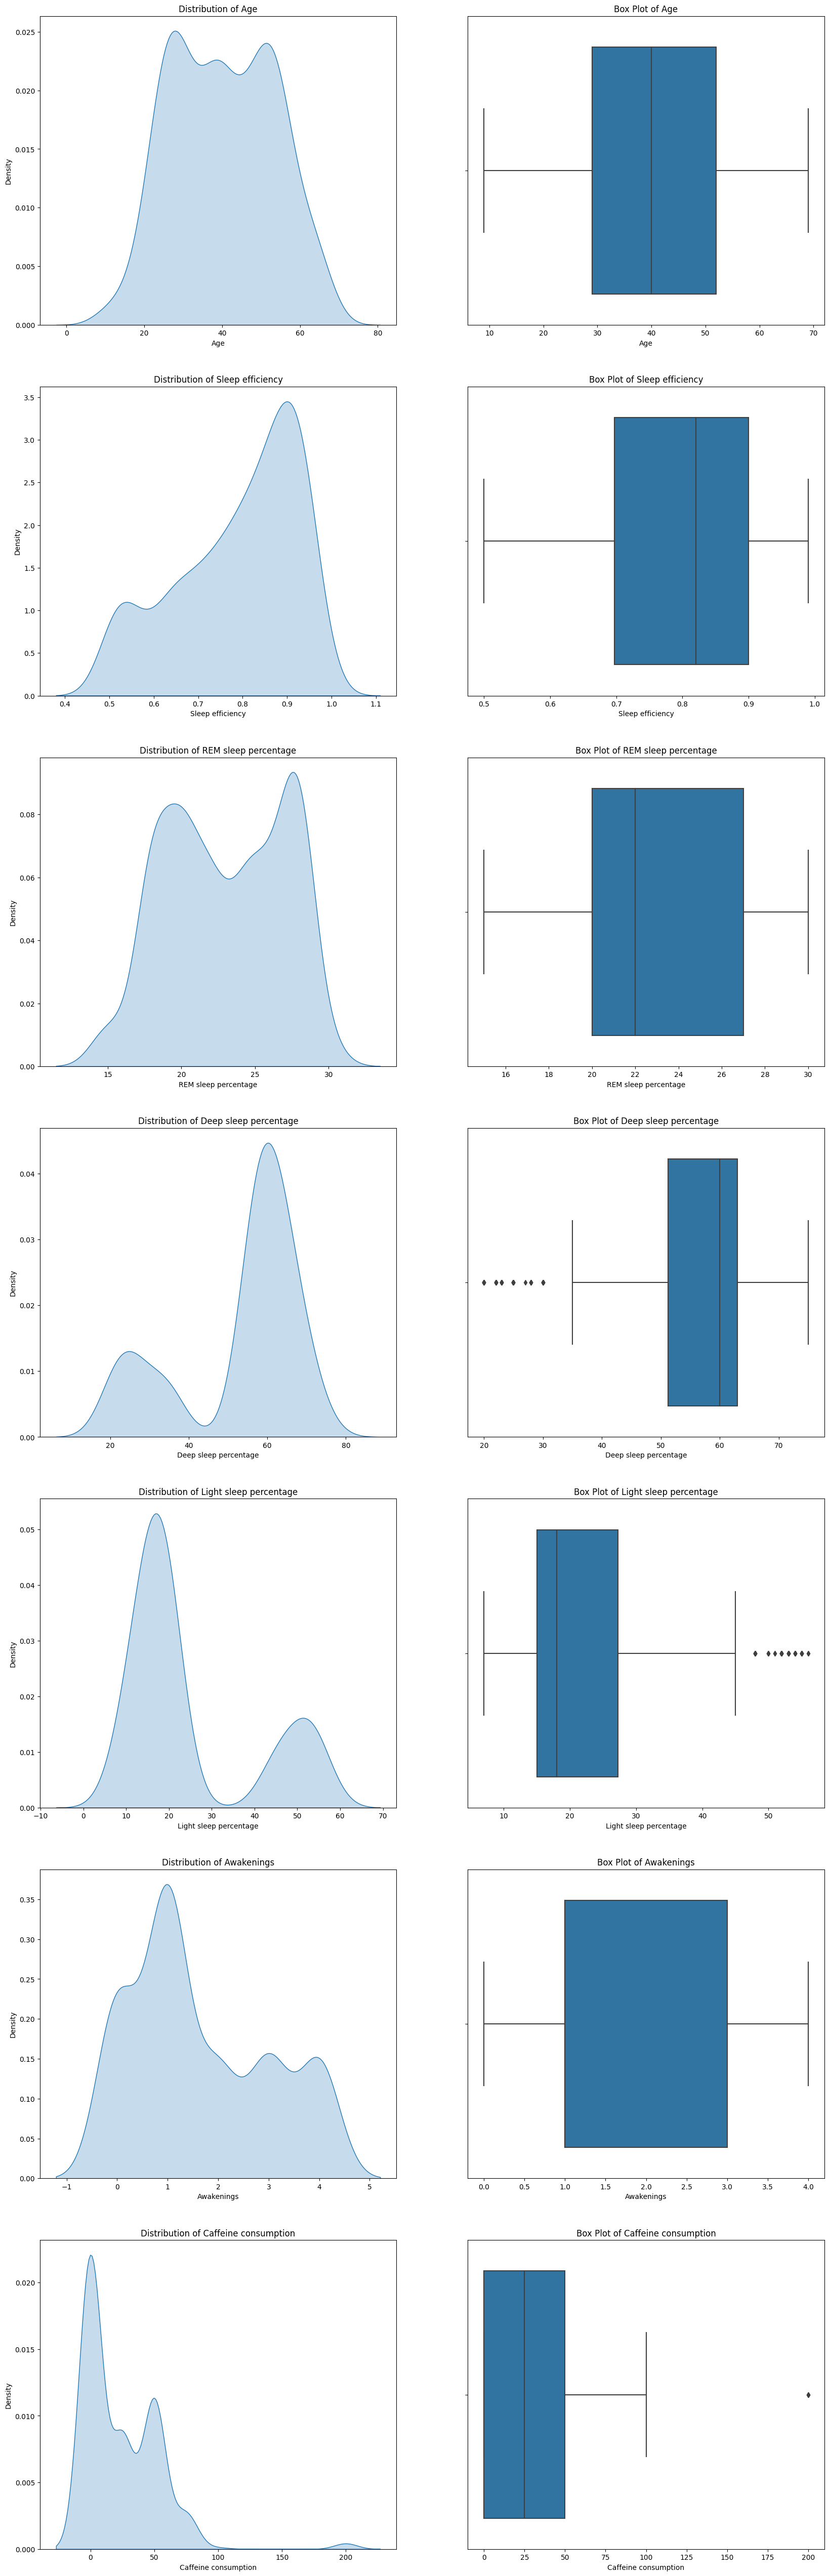

In [ ]:
fig, ax = plt.subplots(7,2, figsize=(20,65))
idx = 0

features = ['Age', 'Sleep efficiency', 'REM sleep percentage',
            'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
            'Caffeine consumption']

for column in (features):
    sns.kdeplot(data=df, x=column, fill=True, ax=ax[idx][0]).set_title(f'Distribution of {column}', fontsize='12')
    sns.boxplot(data=df, x=column, orient='h', ax=ax[idx][1]).set_title(f'Box Plot of {column}', fontsize='12')
    idx +=1

plt.show()


## Linear Correlations
- High linear correlation between Light sleep percentage, Deep sleep percentage, and Sleep efficiency
- High linear correlation between Wakeup_hour and Bedtime_hour

<ipython-input-15-50b1f5da43b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(),


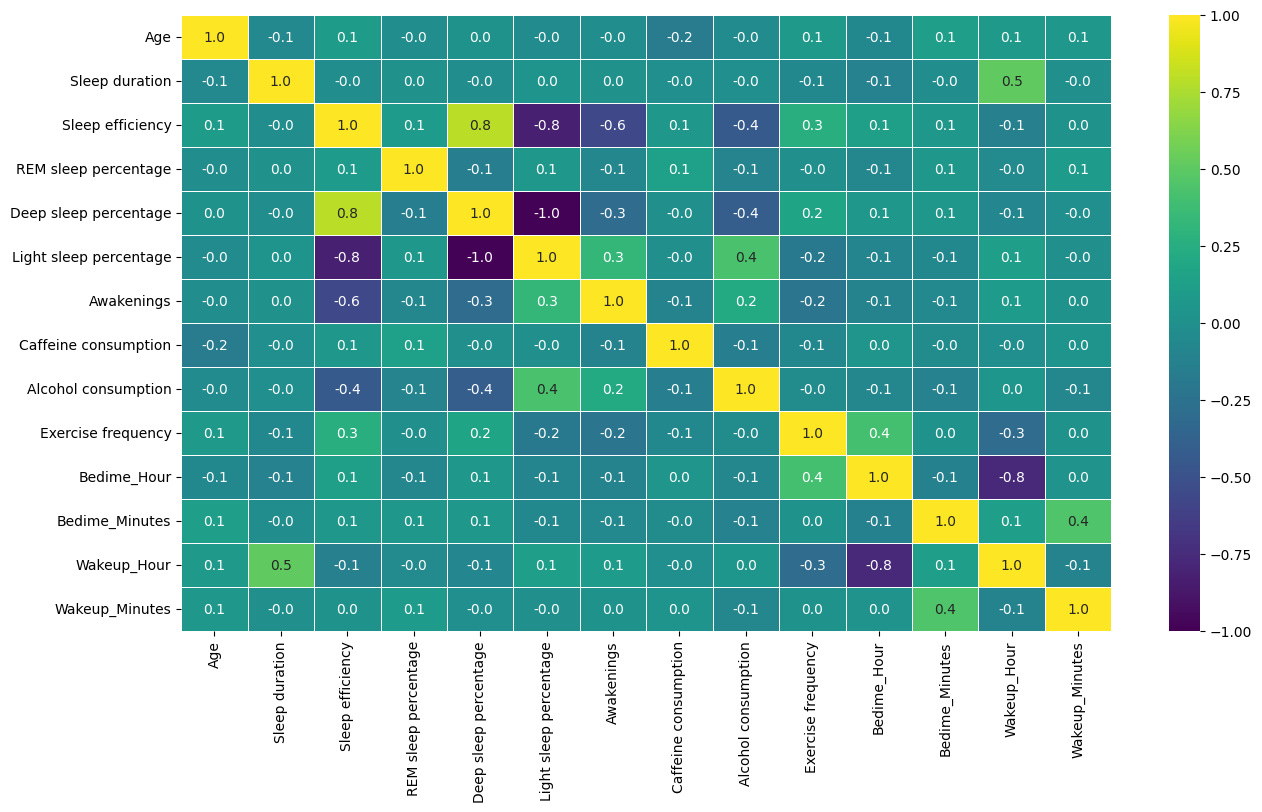

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
# ax.xaxis.tick_top()
sns.heatmap(data = df.corr(),
            annot = True,
            fmt = '.1f',
            linewidth = .5,
            vmax = 1,
            vmin = -1,
            cmap = 'viridis'
           )
plt.show()


## Summing percentages of sleep
- Deep sleep, light sleep, and REM sleep stage percentages don't always add up to 100%

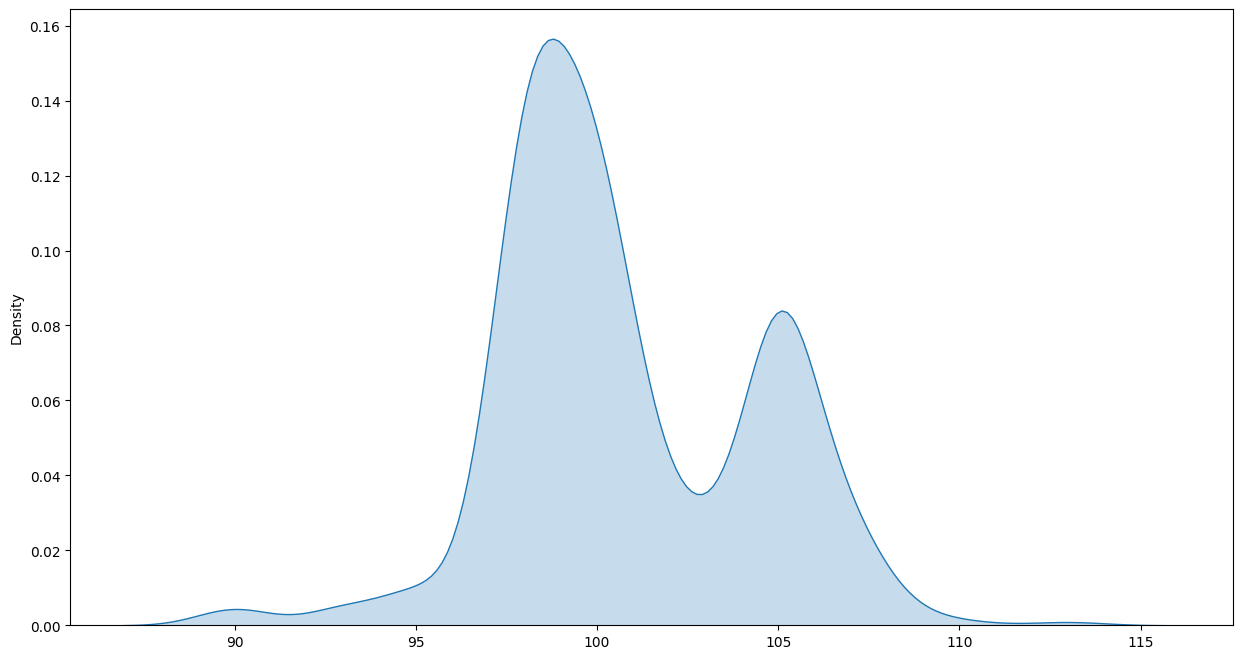

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df['Deep sleep percentage'] + df['Light sleep percentage']  + df['REM sleep percentage'],
           fill = True)
plt.show()

## Imputing missing values with most frequent value

In [ ]:
imputer = SimpleImputer(strategy = "most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

## Grading Sleep Categories
- Assigning Pass (1) or Fail (0) for each sleep measurement
- Summing the score of all measurements to grade each person's sleep quality (0 = Poor, 5 = Great)

In [ ]:
# Getting at least 7 hours of sleep
df['sleep_duration_grade'] = [int(x >= 7) for x in df['Sleep duration']]

# Deep sleep between 13% and 23% of sleep
df['deep_sleep_grade'] = [int((x >= 13 and x <= 23)) for x in df['Deep sleep percentage']]

# Light sleep between 45% and 55% of sleep
df['light_sleep_grade'] = [int((x >= 45 and x <= 55)) for x in df['Light sleep percentage']]

# Waking up 1 or less times
df['awakenings_grade'] = [int(x <= 1) for x in df['Awakenings']]

# Asleep for at least 85% of the night
df['sleep_efficiency_grade'] = [int(x >= .85) for x in df['Sleep efficiency']]

# Summing each grade
df['sleep_quality'] = df['sleep_duration_grade'] + df['deep_sleep_grade'] + \
                      df['light_sleep_grade'] + df['awakenings_grade'] + \
                      df['sleep_efficiency_grade']

## Distribution of Sleep Quality Scores
- No one achieved a perfect sleep quality score of 5
- Most achieved a score of 3

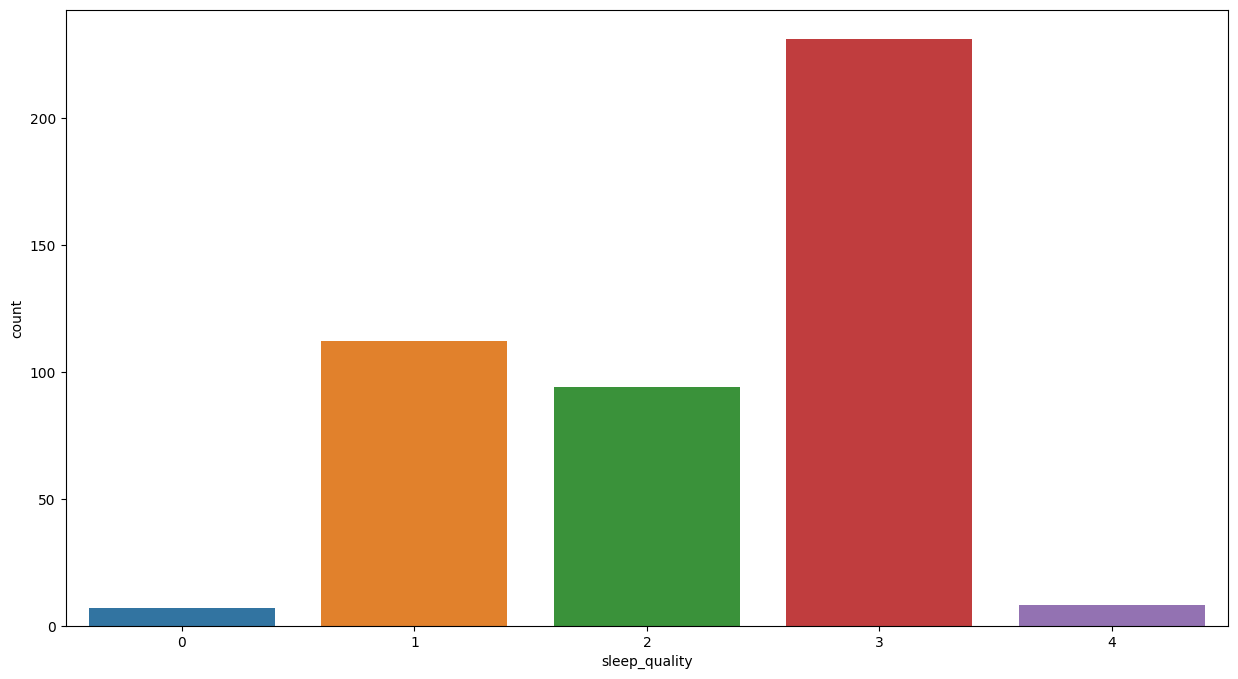

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.countplot(data = df,
              x = 'sleep_quality')
plt.show()

## Sleep quality scores by each sleep measurement
- Of the people who achieved a sleep quality score of 4, they:
    - Had the least amount of awakenings
    - Had the highest % of light sleep
    - Had the lowest % of deep sleep

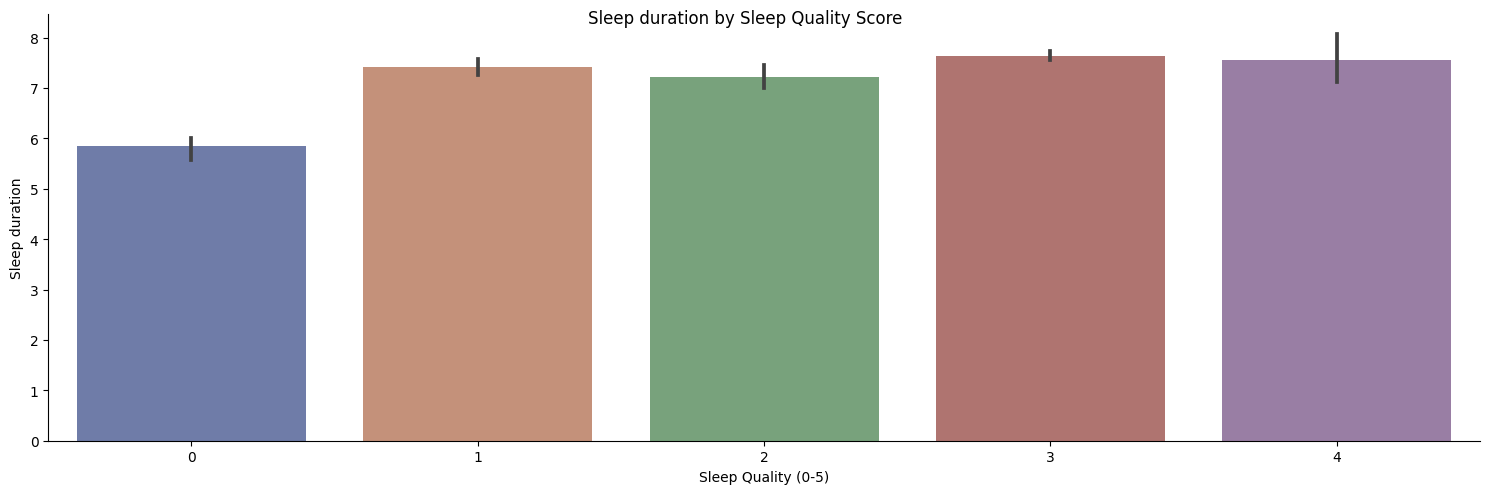

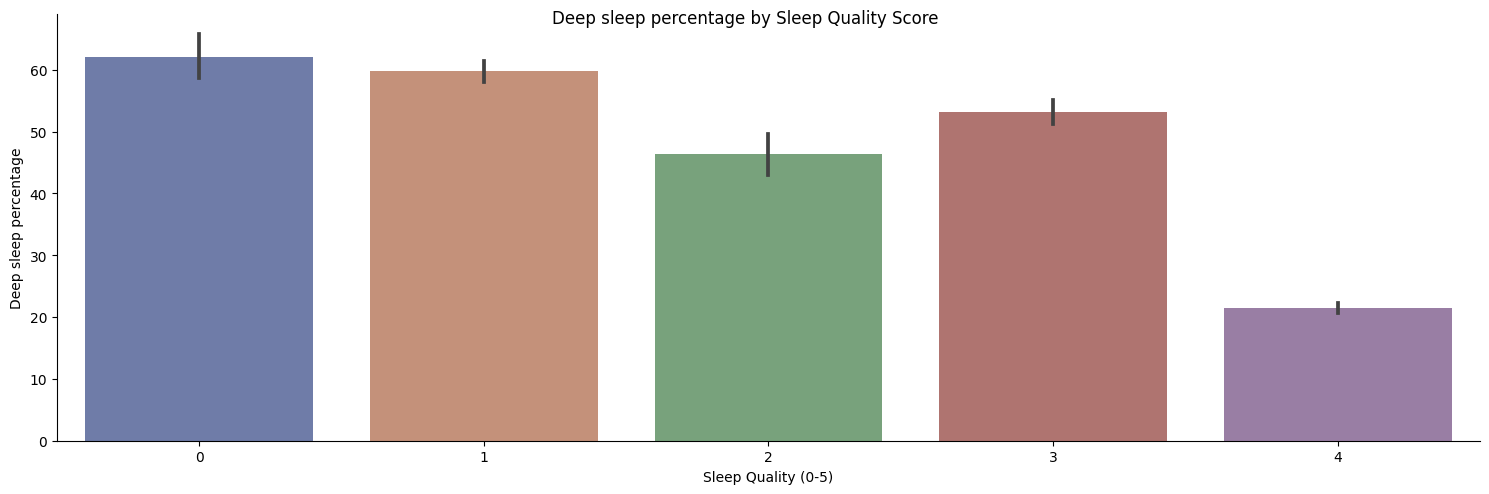

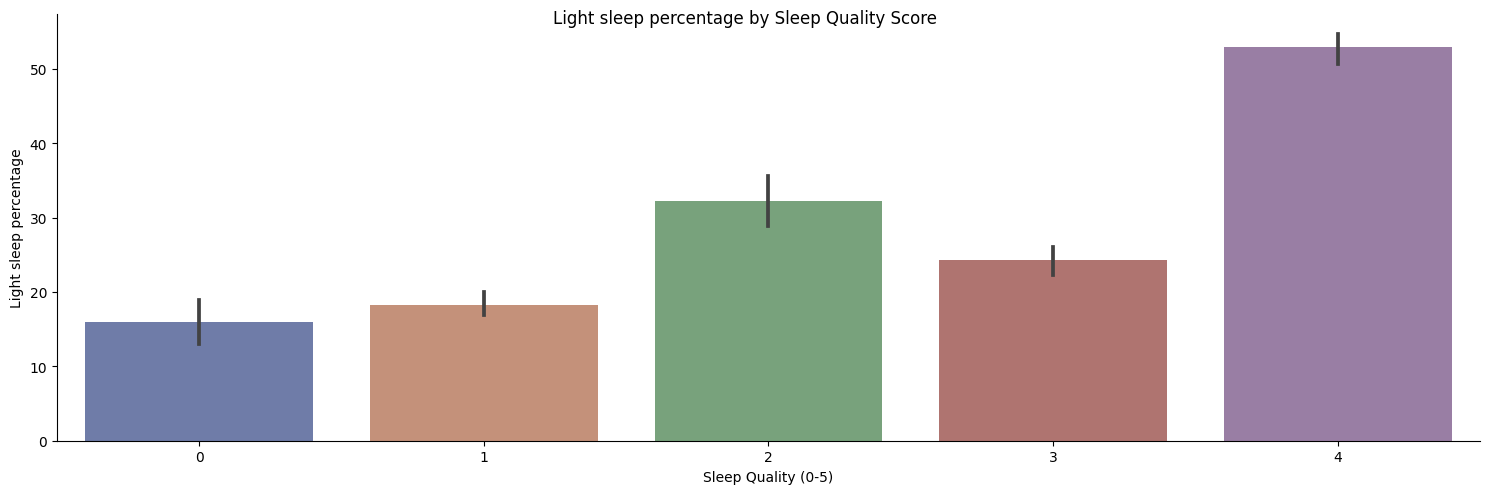

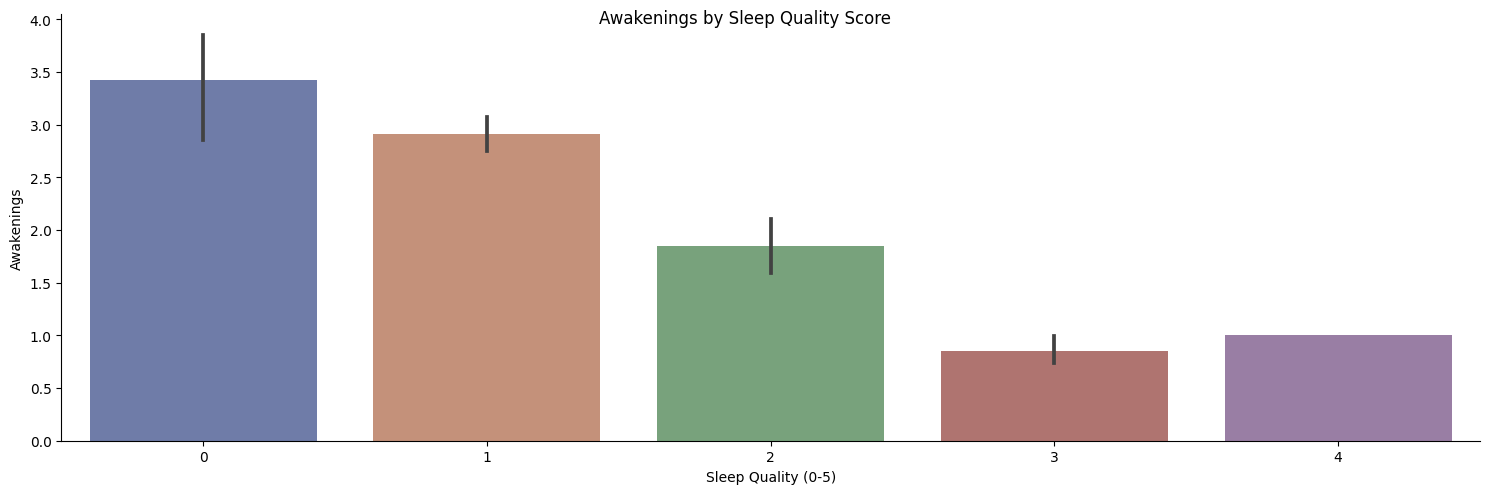

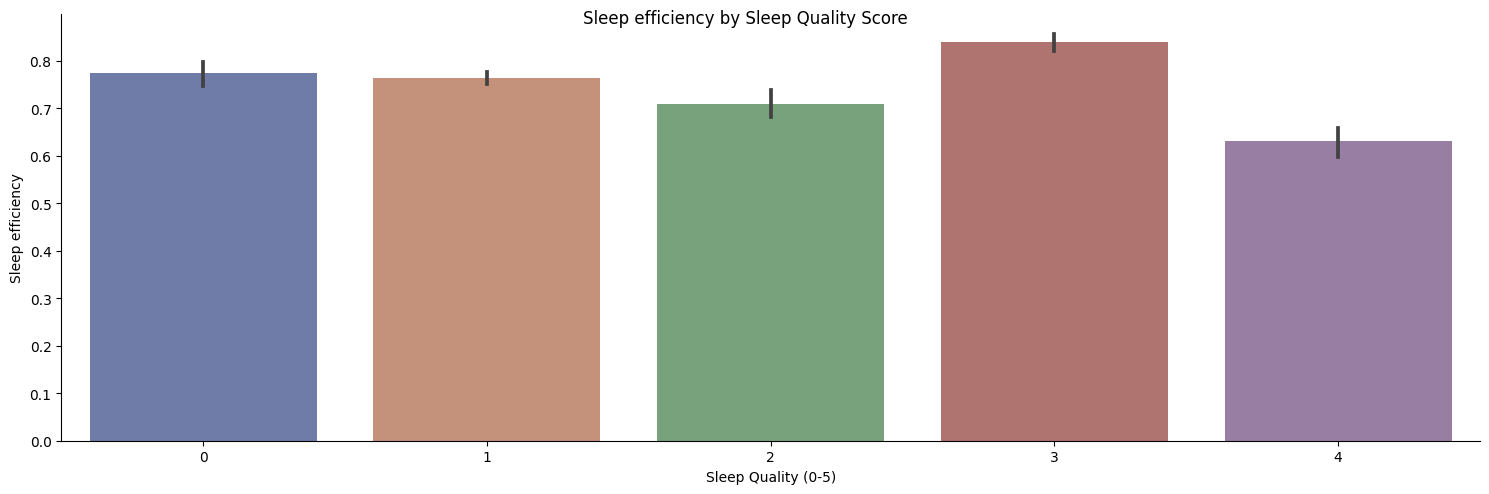

In [ ]:
sleep_measurements = ('Sleep duration', 'Deep sleep percentage','Light sleep percentage','Awakenings','Sleep efficiency')

for column in sleep_measurements:
    p = sns.catplot(data = df,
                    x = 'sleep_quality',
                    y = column,
                    kind = 'bar',
                    palette = 'dark',
                    alpha = .6,
                    height = 5,
                    aspect = 3
                    )

    p.set_axis_labels("Sleep Quality (0-5)", column)
    p.fig.suptitle(f'{column} by Sleep Quality Score')

## Conclusion:
From the distributions of each sleep measurement and the sleep quality scores, it appears that the ratio of light and deep sleep for many individuals is the opposite of what it should be. Most people spend the majority of their sleep in a deep sleep as opposed to light sleep. Based on our sleep quality criteria from the Sleep Foundation, about half of an individual's total sleep should be in the light sleep phase.

## Recommendations:
Based on the sleep quality results, most people sleep for enough hours and have good sleep efficiency. The largest improvement most people can make is to increase the amount of light sleep they get in relation to their deep sleep and reduce the number of awakenings. There are also other factors that could help in achieving better sleep such as increasing excerise and reducing caffeine intake in the afternoon. It would be helpful if this dataset expanded the definitions of what the excercise frequency feature meant as well as added a time component to the caffeine intake. Below are additional tips from the CDC for improving sleep.

## Tips for better sleep
#### (https://www.cdc.gov/sleep/about_sleep/sleep_hygiene.html)
- Get some exercise. Being physically active during the day can help you fall asleep more easily at night.
- Avoid large meals, caffeine, and alcohol before bedtime
- Be consistent. Go to bed at the same time each night and get up at the same time each morning, including on the weekends
- Make sure your bedroom is quiet, dark, relaxing, and at a comfortable temperature
- Remove electronic devices, such as TVs, computers, and smart phones, from the bedroom



Thank you for taking the time to review this workbook.

Please feel free leave comments or feedback!

-Ben